#### The model would be built using the custum code and using the sklearn library
 - Data import
 - Data preprocessing
 - Data visulization
 - Model 
 - Accuracy

In [49]:
### Data import


import pandas as pd
X_Uncleaned = pd.read_csv('Linear_X_Train.csv').values
Y_Uncleaned = pd.read_csv('Linear_Y_Train.csv').values
print(X_Uncleaned.shape)
print(Y_Uncleaned.shape)

(3750, 1)
(3750, 1)


In [50]:
### Data preprocessing

print("Before normilization")
### Statistical data analysis
print("X-mean:{} \n X-std:{} \n\n\n".format(X_Uncleaned.mean(),X_Uncleaned.std()))


##Normilization
X_Cleaned = (X_Uncleaned - X_Uncleaned.mean())/X_Uncleaned.std()

print("After normilization")
### Statistical data analysis
print("X-mean:{} \n X-std:{} \n\n\n".format(X_Uncleaned.mean(),X_Uncleaned.std()))

from sklearn.model_selection import train_test_split
### Dividing the data into the training part and testing part
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X_Cleaned,Y_Uncleaned,test_size=0.2)

print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)

Before normilization
X-mean:-0.03779466168006855 
 X-std:0.9920801322508517 



After normilization
X-mean:-0.03779466168006855 
 X-std:0.9920801322508517 



(3000, 1)
(750, 1)
(3000, 1)
(750, 1)


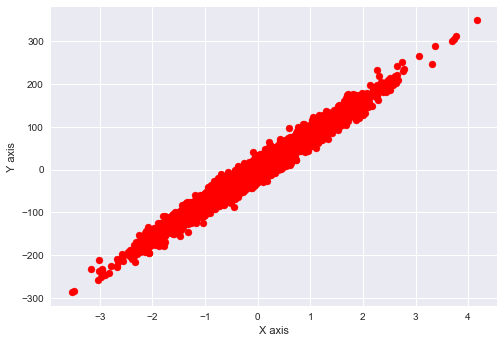

In [51]:
### Exploratory Data analysis

import matplotlib.pyplot as plt

plt.style.use("seaborn")
plt.scatter(X_Cleaned,Y_Uncleaned,color="red")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

In [113]:
### Model
"""Written by Deepanshu Garg"""

import numpy as np
def hypothesis(x,theta):
    """Function returns the prediction"""
    return x*theta[1] + theta[0]

def error(x,y,theta):
    """Function returns the error"""
    loss = 0.0
    for i in range(x.shape[0]):
        loss += (y[i] - hypothesis(x[i],theta))**2
    
    return loss/x.shape[0] ### Decrease the loss good for the c++ users

def grad(x,y,theta):
    """Function is used for calculation the differential part of the gradient descent"""
    grad = np.zeros((2,))
    
    for i in range(x.shape[0]):
        grad[0] = grad[0] + (hypothesis(x[i],theta) - y[i])
        grad[1] = grad[1] + (hypothesis(x[i],theta) - y[i])*x[i]
    
    return grad/x.shape[0]

def gradientDescent(x,y,itr = 300,learning_rate = 0.1):
    """Function is the implementation of the gradient descnet function"""
    currItr = 0
    theta = np.zeros((2,))
    errorVal = []
    
    while currItr < itr :
        gradVal = grad(x,y,theta)
        errorVal.append(error(x,y,theta))
        theta = theta - learning_rate*gradVal
        currItr += 1
        
    return theta,errorVal

In [99]:
theta,errorVal = gradientDescent(X_Train,Y_Train,300)

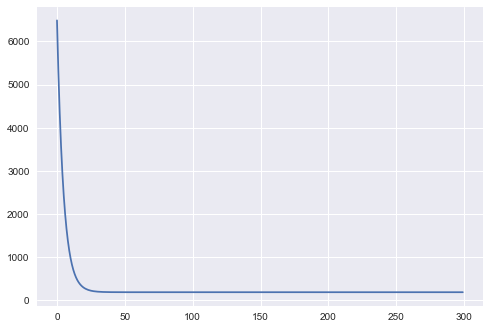

In [100]:
## Visulization of the error
plt.plot(errorVal)

[-239.02518836924787, -185.76759158005729, -132.5099947908667, -79.25239800167613, -25.99480121248555, 27.26279557670502, 80.52039236589563, 133.77798915508617, 187.0355859442768, 240.2931827334674]


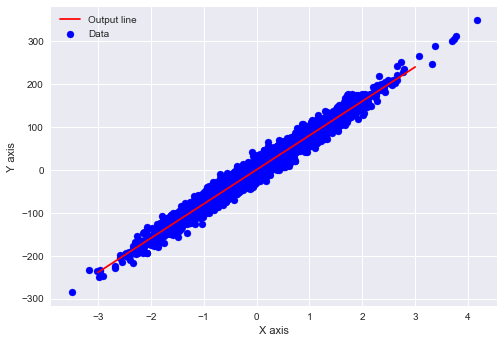

In [104]:
### Visulizing the boundary
x_line = np.linspace(-3,3,10)

y_line = [hypothesis(i,theta) for i in x_line]

print(y_line)

plt.style.use("seaborn")
plt.scatter(X_Train,Y_Train,color="blue",label = "Data")
plt.plot(x_line,y_line,color="red",label="Output line")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.legend()
plt.show()

In [110]:
### Using the sklearn

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_Train,Y_Train)
print("theta0 : {}".format(lr.coef_))
print("theta1 : {}".format(lr.intercept_))

theta0 : [[79.88639518]]
theta1 : [0.63399718]


In [112]:
print(lr.score(X_Test,Y_Test))

0.9718158126345139
